# COGS 108 - EDA Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

# Setup

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm # progress bar for .apply()
from pathlib import Path
%config InlineBackend.figure_format ='retina'

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
disaster2015 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2015.csv')
disaster2015

,"2015 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),7,8,25,0,25
4,AL (Alabama),13,17,14.79,0,14.79
...,...,...,...,...,...,...
67,WI (Wisconsin),4,8,8.73,0.01,8.74
68,WV (West Virginia),4,2,20.73,0,20.73
69,WY (Wyoming),2,5,10.35,0.25,10.6
70,Total,522,2143,4202.01,645.11,4847.12


In [3]:
# rename columns
disaster2015.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2015.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [4]:
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),7,8,25,0,25
4,AL (Alabama),13,17,14.79,0,14.79
...,...,...,...,...,...,...
67,WI (Wisconsin),4,8,8.73,0.01,8.74
68,WV (West Virginia),4,2,20.73,0,20.73
69,WY (Wyoming),2,5,10.35,0.25,10.6
70,Total,522,2143,4202.01,645.11,4847.12


In [5]:
# delete first three rows and last two rows of original dataframe
disaster2015 = disaster2015.drop(labels= [0, 1, 2, 70, 71])

In [6]:
disaster2015 = disaster2015.reset_index(drop= True)
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25,0,25
1,AL (Alabama),13,17,14.79,0,14.79
2,AM (Atlantic South),3,0,0,0,0
3,AN (Atlantic North),4,5,0,0,0
4,AR (Arkansas),10,337,18.25,27.26,45.51
...,...,...,...,...,...,...
62,VT (Vermont),0,0,3.55,0,3.55
63,WA (Washington),8,7,28.94,0.02,28.96
64,WI (Wisconsin),4,8,8.73,0.01,8.74
65,WV (West Virginia),4,2,20.73,0,20.73


In [7]:
# check for missing values
disaster2015.isna().sum()

state              0
fatalities         1
injuries           1
property_damage    1
crop_damage        1
total_damage       0
dtype: int64

In [8]:
# find rows that have missing values
disaster2015[disaster2015.isnull().any(axis=1)]

,state,fatalities,injuries,property_damage,crop_damage,total_damage
39,Report generated: 5/13/2016 3:42:33 PM,NaN,NaN,NaN,NaN,5 / 6


In [9]:
disaster2015 = disaster2015.drop(39)
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25,0,25
1,AL (Alabama),13,17,14.79,0,14.79
2,AM (Atlantic South),3,0,0,0,0
3,AN (Atlantic North),4,5,0,0,0
4,AR (Arkansas),10,337,18.25,27.26,45.51
...,...,...,...,...,...,...
62,VT (Vermont),0,0,3.55,0,3.55
63,WA (Washington),8,7,28.94,0.02,28.96
64,WI (Wisconsin),4,8,8.73,0.01,8.74
65,WV (West Virginia),4,2,20.73,0,20.73


In [10]:
disaster2015.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [11]:
disaster2015.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [12]:
# convert columns to correct data types
disaster2015[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2015[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)


In [13]:
disaster2015.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [14]:
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25.00,0.00,25.00
1,AL (Alabama),13,17,14.79,0.00,14.79
2,AM (Atlantic South),3,0,0.00,0.00,0.00
3,AN (Atlantic North),4,5,0.00,0.00,0.00
4,AR (Arkansas),10,337,18.25,27.26,45.51
...,...,...,...,...,...,...
62,VT (Vermont),0,0,3.55,0.00,3.55
63,WA (Washington),8,7,28.94,0.02,28.96
64,WI (Wisconsin),4,8,8.73,0.01,8.74
65,WV (West Virginia),4,2,20.73,0.00,20.73


In [15]:
disaster2015['state'].unique()

array(['AK (Alaska)', 'AL (Alabama)', 'AM (Atlantic South)',
       'AN (Atlantic North)', 'AR (Arkansas)', 'AS (American Samoa)',
       'AZ (Arizona)', 'CA (California)', 'CO (Colorado)',
       'CT (Connecticut)', 'DC (District of Columbia)', 'DE (Delaware)',
       'FL (Florida)', 'GA (Georgia)', 'GM (Gulf of Mexico)', 'GU (Guam)',
       'HI (Hawaii)', 'IA (Iowa)', 'ID (Idaho)', 'IL (Illinois)',
       'IN (Indiana)', 'KS (Kansas)', 'KY (Kentucky)', 'LA (Louisiana)',
       'LC (Lake St.Clair)', 'LE (Lake Erie)', 'LH (Lake Huron)',
       'LM (Lake Michigan)', 'LO (Lake Ontario)', 'LS (Lake Superior)',
       'MA (Massachusetts)', 'MD (Maryland)', 'ME (Maine)',
       'MI (Michigan)', 'MN (Minnesota)', 'MO (Missouri)',
       'MS (Mississippi)', 'MT (Montana)', 'NC (North Carolina)',
       'ND (North Dakota)', 'NE (Nebraska)', 'NH (New Hampshire)',
       'NJ (New Jersey)', 'NM (New Mexico)', 'NV (Nevada)',
       'NY (New York)', 'OH (Ohio)', 'OK (Oklahoma)', 'OR (Oregon)',
    

In [16]:
non_states = ['AM (Atlantic South)','AN (Atlantic North)', 'AS (American Samoa)',
             'DC (District of Columbia)', 'GM (Gulf of Mexico)',
             'GU (Guam)', 'LC (Lake St.Clair)', 'LE (Lake Erie)', 'LH (Lake Huron)',
             'LM (Lake Michigan)', 'LO (Lake Ontario)', 'LS (Lake Superior)',
             'PH (Hawaii Waters)', 'PR (Puerto Rico)', 'PZ (East Pacific)',
             'VI (Virgin Islands)']

In [17]:
disaster2015['state'].isin(non_states)

0     False
1     False
2      True
3      True
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Name: state, Length: 66, dtype: bool

In [18]:
# filter dataframe to contain rows with states in US only
disaster2015 = disaster2015[~disaster2015['state'].isin(non_states)]
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25.00,0.00,25.00
1,AL (Alabama),13,17,14.79,0.00,14.79
4,AR (Arkansas),10,337,18.25,27.26,45.51
6,AZ (Arizona),8,58,10.74,0.05,10.79
7,CA (California),12,40,108.51,0.20,108.71
8,CO (Colorado),3,21,8.21,1.82,10.03
9,CT (Connecticut),2,3,1.50,0.00,1.50
11,DE (Delaware),0,4,0.55,0.00,0.55
12,FL (Florida),28,81,26.00,1.00,27.00
13,GA (Georgia),5,21,33.51,0.01,33.53


In [19]:
disaster2015 = disaster2015.reset_index(drop= True)
disaster2015

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25.00,0.00,25.00
1,AL (Alabama),13,17,14.79,0.00,14.79
2,AR (Arkansas),10,337,18.25,27.26,45.51
3,AZ (Arizona),8,58,10.74,0.05,10.79
4,CA (California),12,40,108.51,0.20,108.71
5,CO (Colorado),3,21,8.21,1.82,10.03
6,CT (Connecticut),2,3,1.50,0.00,1.50
7,DE (Delaware),0,4,0.55,0.00,0.55
8,FL (Florida),28,81,26.00,1.00,27.00
9,GA (Georgia),5,21,33.51,0.01,33.53


In [20]:
disaster2015.shape

(50, 6)

In [21]:
disaster2020 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2020.csv')
disaster2020

,"2020 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),5,0,35.85,0,35.85
4,AL (Alabama),11,27,313.39,2.08,315.47
...,...,...,...,...,...,...
66,WA (Washington),5,11,1340.16,0.52,1340.68
67,WI (Wisconsin),11,1,79.28,0.26,79.54
68,WV (West Virginia),1,3,5.62,0,5.62
69,WY (Wyoming),0,0,0.03,0,0.03


In [22]:
# rename columns
disaster2020.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2020.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [23]:
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),5,0,35.85,0,35.85
4,AL (Alabama),11,27,313.39,2.08,315.47
...,...,...,...,...,...,...
66,WA (Washington),5,11,1340.16,0.52,1340.68
67,WI (Wisconsin),11,1,79.28,0.26,79.54
68,WV (West Virginia),1,3,5.62,0,5.62
69,WY (Wyoming),0,0,0.03,0,0.03


In [24]:
# delete first three rows and last row of original dataframe
disaster2020 = disaster2020.drop(labels= [0, 1, 2, 70])

In [25]:
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
3,AK (Alaska),5,0,35.85,0,35.85
4,AL (Alabama),11,27,313.39,2.08,315.47
5,AM (Atlantic South),0,0,0,0,0
6,AN (Atlantic North),0,0,0.01,0,0.01
7,AR (Arkansas),2,32,313.81,1.41,315.21
...,...,...,...,...,...,...
65,VT (Vermont),0,0,1.91,0.01,1.92
66,WA (Washington),5,11,1340.16,0.52,1340.68
67,WI (Wisconsin),11,1,79.28,0.26,79.54
68,WV (West Virginia),1,3,5.62,0,5.62


In [26]:
disaster2020 = disaster2020.reset_index(drop= True)
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),5,0,35.85,0,35.85
1,AL (Alabama),11,27,313.39,2.08,315.47
2,AM (Atlantic South),0,0,0,0,0
3,AN (Atlantic North),0,0,0.01,0,0.01
4,AR (Arkansas),2,32,313.81,1.41,315.21
...,...,...,...,...,...,...
62,VT (Vermont),0,0,1.91,0.01,1.92
63,WA (Washington),5,11,1340.16,0.52,1340.68
64,WI (Wisconsin),11,1,79.28,0.26,79.54
65,WV (West Virginia),1,3,5.62,0,5.62


In [27]:
# check for missing values
disaster2020.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [28]:
disaster2020.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [29]:
# convert columns to correct data types
disaster2020[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2020[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)


In [30]:
disaster2020.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [31]:
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),5,0,35.85,0.00,35.85
1,AL (Alabama),11,27,313.39,2.08,315.47
2,AM (Atlantic South),0,0,0.00,0.00,0.00
3,AN (Atlantic North),0,0,0.01,0.00,0.01
4,AR (Arkansas),2,32,313.81,1.41,315.21
...,...,...,...,...,...,...
62,VT (Vermont),0,0,1.91,0.01,1.92
63,WA (Washington),5,11,1340.16,0.52,1340.68
64,WI (Wisconsin),11,1,79.28,0.26,79.54
65,WV (West Virginia),1,3,5.62,0.00,5.62


In [32]:
disaster2020['state'].unique()

array(['AK (Alaska)', 'AL (Alabama)', 'AM (Atlantic South)',
       'AN (Atlantic North)', 'AR (Arkansas)', 'AS (American Samoa)',
       'AZ (Arizona)', 'CA (California)', 'CO (Colorado)',
       'CT (Connecticut)', 'DC (District of Columbia)', 'DE (Delaware)',
       'FL (Florida)', 'GA (Georgia)', 'GM (Gulf of Mexico)', 'GU (Guam)',
       'HI (Hawaii)', 'IA (Iowa)', 'ID (Idaho)', 'IL (Illinois)',
       'IN (Indiana)', 'KS (Kansas)', 'KY (Kentucky)', 'LA (Louisiana)',
       'LC (Lake St.Clair)', 'LE (Lake Erie)', 'LH (Lake Huron)',
       'LM (Lake Michigan)', 'LO (Lake Ontario)', 'LS (Lake Superior)',
       'MA (Massachusetts)', 'MD (Maryland)', 'ME (Maine)',
       'MI (Michigan)', 'MN (Minnesota)', 'MO (Missouri)',
       'MS (Mississippi)', 'MT (Montana)', 'NC (North Carolina)',
       'ND (North Dakota)', 'NE (Nebraska)', 'NH (New Hampshire)',
       'NJ (New Jersey)', 'NM (New Mexico)', 'NV (Nevada)',
       'NY (New York)', 'OH (Ohio)', 'OK (Oklahoma)', 'OR (Oregon)',
    

In [33]:
non_states_2020 = ['AM (Atlantic South)','AN (Atlantic North)', 'AS (American Samoa)',
             'DC (District of Columbia)', 'GM (Gulf of Mexico)',
             'GU (Guam)', 'LC (Lake St.Clair)', 'LE (Lake Erie)', 'LH (Lake Huron)',
             'LM (Lake Michigan)', 'LO (Lake Ontario)', 'LS (Lake Superior)',
             'PH (Hawaii Waters)', 'PR (Puerto Rico)', 'PZ (East Pacific)',
             'VI (Virgin Islands)', 'SL (St.Lawrence River)']

In [34]:
disaster2020 = disaster2020[~disaster2020['state'].isin(non_states_2020)]
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),5,0,35.85,0.00,35.85
1,AL (Alabama),11,27,313.39,2.08,315.47
4,AR (Arkansas),2,32,313.81,1.41,315.21
6,AZ (Arizona),45,8,3.95,0.00,3.95
7,CA (California),46,253,41.49,0.00,41.49
8,CO (Colorado),12,9,295.98,30.00,325.98
9,CT (Connecticut),1,1,56.40,0.00,56.40
11,DE (Delaware),0,0,0.00,0.00,0.00
12,FL (Florida),19,29,361.30,90.03,451.33
13,GA (Georgia),17,48,33.95,0.01,33.96


In [35]:
disaster2020 = disaster2020.reset_index(drop= True)
disaster2020

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),5,0,35.85,0.00,35.85
1,AL (Alabama),11,27,313.39,2.08,315.47
2,AR (Arkansas),2,32,313.81,1.41,315.21
3,AZ (Arizona),45,8,3.95,0.00,3.95
4,CA (California),46,253,41.49,0.00,41.49
5,CO (Colorado),12,9,295.98,30.00,325.98
6,CT (Connecticut),1,1,56.40,0.00,56.40
7,DE (Delaware),0,0,0.00,0.00,0.00
8,FL (Florida),19,29,361.30,90.03,451.33
9,GA (Georgia),17,48,33.95,0.01,33.96


In [36]:
disaster2020.shape

(50, 6)

In [37]:
disaster2016 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2016.csv')
disaster2016

,"2016 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),4,2,0.2,0,0.2
4,AL (Alabama),7,32,4.31,0,4.31
...,...,...,...,...,...,...
68,WI (Wisconsin),20,33,37.28,0.67,37.95
69,WV (West Virginia),24,12,172.54,0,172.54
70,WY (Wyoming),6,4,3.1,0,3.1
71,Total,458,1276,18194.7,243.29,18438


In [38]:
disaster2016.columns

Index(['2016 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [39]:
# rename columns
disaster2016.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2016.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [40]:
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),4,2,0.2,0,0.2
4,AL (Alabama),7,32,4.31,0,4.31
...,...,...,...,...,...,...
68,WI (Wisconsin),20,33,37.28,0.67,37.95
69,WV (West Virginia),24,12,172.54,0,172.54
70,WY (Wyoming),6,4,3.1,0,3.1
71,Total,458,1276,18194.7,243.29,18438


In [41]:
# delete first three rows and last two rows of original dataframe
disaster2016 = disaster2016.drop(labels= [0, 1, 2, 71, 72])
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
3,AK (Alaska),4,2,0.2,0,0.2
4,AL (Alabama),7,32,4.31,0,4.31
5,AM (Atlantic South),4,2,0,0,0
6,AN (Atlantic North),0,0,0,0,0
7,AR (Arkansas),2,8,13.38,0.2,13.58
...,...,...,...,...,...,...
66,VT (Vermont),1,0,3.94,0,3.94
67,WA (Washington),5,6,8.43,0,8.43
68,WI (Wisconsin),20,33,37.28,0.67,37.95
69,WV (West Virginia),24,12,172.54,0,172.54


In [42]:
disaster2016 = disaster2016.reset_index(drop= True)
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),4,2,0.2,0,0.2
1,AL (Alabama),7,32,4.31,0,4.31
2,AM (Atlantic South),4,2,0,0,0
3,AN (Atlantic North),0,0,0,0,0
4,AR (Arkansas),2,8,13.38,0.2,13.58
...,...,...,...,...,...,...
63,VT (Vermont),1,0,3.94,0,3.94
64,WA (Washington),5,6,8.43,0,8.43
65,WI (Wisconsin),20,33,37.28,0.67,37.95
66,WV (West Virginia),24,12,172.54,0,172.54


In [43]:
# check for missing values
disaster2016.isna().sum()

state              0
fatalities         1
injuries           1
property_damage    1
crop_damage        1
total_damage       0
dtype: int64

In [44]:
# find rows that have missing values
disaster2016[disaster2016.isnull().any(axis=1)]

,state,fatalities,injuries,property_damage,crop_damage,total_damage
39,Report generated: 5/11/2017 10:46:03 AM,NaN,NaN,NaN,NaN,5 / 6


In [45]:
disaster2016 = disaster2016.drop(39)
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),4,2,0.2,0,0.2
1,AL (Alabama),7,32,4.31,0,4.31
2,AM (Atlantic South),4,2,0,0,0
3,AN (Atlantic North),0,0,0,0,0
4,AR (Arkansas),2,8,13.38,0.2,13.58
...,...,...,...,...,...,...
63,VT (Vermont),1,0,3.94,0,3.94
64,WA (Washington),5,6,8.43,0,8.43
65,WI (Wisconsin),20,33,37.28,0.67,37.95
66,WV (West Virginia),24,12,172.54,0,172.54


In [46]:
disaster2016.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [47]:
disaster2016.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [48]:
# convert columns to correct data types
disaster2016[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2016[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)
disaster2016.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [49]:
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),4,2,0.20,0.00,0.20
1,AL (Alabama),7,32,4.31,0.00,4.31
2,AM (Atlantic South),4,2,0.00,0.00,0.00
3,AN (Atlantic North),0,0,0.00,0.00,0.00
4,AR (Arkansas),2,8,13.38,0.20,13.58
...,...,...,...,...,...,...
63,VT (Vermont),1,0,3.94,0.00,3.94
64,WA (Washington),5,6,8.43,0.00,8.43
65,WI (Wisconsin),20,33,37.28,0.67,37.95
66,WV (West Virginia),24,12,172.54,0.00,172.54


In [50]:
len(disaster2016['state'].unique())

67

In [51]:
disaster2016['state'].unique()

array(['AK (Alaska)', 'AL (Alabama)', 'AM (Atlantic South)',
       'AN (Atlantic North)', 'AR (Arkansas)', 'AS (American Samoa)',
       'AZ (Arizona)', 'CA (California)', 'CO (Colorado)',
       'CT (Connecticut)', 'DC (District of Columbia)', 'DE (Delaware)',
       'FL (Florida)', 'GA (Georgia)', 'GM (Gulf of Mexico)', 'GU (Guam)',
       'HI (Hawaii)', 'IA (Iowa)', 'ID (Idaho)', 'IL (Illinois)',
       'IN (Indiana)', 'KS (Kansas)', 'KY (Kentucky)', 'LA (Louisiana)',
       'LC (Lake St.Clair)', 'LE (Lake Erie)', 'LH (Lake Huron)',
       'LM (Lake Michigan)', 'LO (Lake Ontario)', 'LS (Lake Superior)',
       'MA (Massachusetts)', 'MD (Maryland)', 'ME (Maine)',
       'MI (Michigan)', 'MN (Minnesota)', 'MO (Missouri)',
       'MS (Mississippi)', 'MT (Montana)', 'NC (North Carolina)',
       'ND (North Dakota)', 'NE (Nebraska)', 'NH (New Hampshire)',
       'NJ (New Jersey)', 'NM (New Mexico)', 'NV (Nevada)',
       'NY (New York)', 'OH (Ohio)', 'OK (Oklahoma)', 'OR (Oregon)',
    

In [52]:
disaster2016 = disaster2016[~disaster2016['state'].isin(non_states_2020)]
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),4,2,0.20,0.00,0.20
1,AL (Alabama),7,32,4.31,0.00,4.31
4,AR (Arkansas),2,8,13.38,0.20,13.58
6,AZ (Arizona),11,36,6.33,4.60,10.93
7,CA (California),22,29,74.31,0.08,74.38
8,CO (Colorado),5,14,0.86,0.04,0.90
9,CT (Connecticut),0,4,1.75,0.00,1.75
11,DE (Delaware),0,18,0.04,0.00,0.04
12,FL (Florida),31,53,3116.31,0.01,3116.32
13,GA (Georgia),11,25,35.25,3.00,38.25


In [53]:
disaster2016 = disaster2016.reset_index(drop= True)
disaster2016

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),4,2,0.20,0.00,0.20
1,AL (Alabama),7,32,4.31,0.00,4.31
2,AR (Arkansas),2,8,13.38,0.20,13.58
3,AZ (Arizona),11,36,6.33,4.60,10.93
4,CA (California),22,29,74.31,0.08,74.38
5,CO (Colorado),5,14,0.86,0.04,0.90
6,CT (Connecticut),0,4,1.75,0.00,1.75
7,DE (Delaware),0,18,0.04,0.00,0.04
8,FL (Florida),31,53,3116.31,0.01,3116.32
9,GA (Georgia),11,25,35.25,3.00,38.25


In [54]:
disaster2016.shape

(50, 6)

In [55]:
disaster2017 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2017.csv')
disaster2017

,"2017 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),2,0,6.53,0,6.53
4,AL (Alabama),14,35,31.59,0,31.59
...,...,...,...,...,...,...
68,WI (Wisconsin),10,29,82.84,41.43,124.27
69,WV (West Virginia),2,2,6.88,0,6.88
70,WY (Wyoming),1,1,3,0,3
71,Total,508,1205,87377.5,1913.21,89290.72


In [56]:
# rename columns
disaster2017.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2017.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [57]:
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),2,0,6.53,0,6.53
4,AL (Alabama),14,35,31.59,0,31.59
...,...,...,...,...,...,...
68,WI (Wisconsin),10,29,82.84,41.43,124.27
69,WV (West Virginia),2,2,6.88,0,6.88
70,WY (Wyoming),1,1,3,0,3
71,Total,508,1205,87377.5,1913.21,89290.72


In [58]:
# delete first three rows and last two rows of original dataframe
disaster2017 = disaster2017.drop(labels= [0, 1, 2, 71, 72])
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
3,AK (Alaska),2,0,6.53,0,6.53
4,AL (Alabama),14,35,31.59,0,31.59
5,AM (Atlantic South),3,0,0,0,0
6,AN (Atlantic North),1,0,0.01,0,0.01
7,AR (Arkansas),9,17,37.58,23.51,61.09
...,...,...,...,...,...,...
66,VT (Vermont),0,1,14.53,0.11,14.64
67,WA (Washington),1,7,82.47,0,82.47
68,WI (Wisconsin),10,29,82.84,41.43,124.27
69,WV (West Virginia),2,2,6.88,0,6.88


In [59]:
disaster2017 = disaster2017.reset_index(drop= True)
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),2,0,6.53,0,6.53
1,AL (Alabama),14,35,31.59,0,31.59
2,AM (Atlantic South),3,0,0,0,0
3,AN (Atlantic North),1,0,0.01,0,0.01
4,AR (Arkansas),9,17,37.58,23.51,61.09
...,...,...,...,...,...,...
63,VT (Vermont),0,1,14.53,0.11,14.64
64,WA (Washington),1,7,82.47,0,82.47
65,WI (Wisconsin),10,29,82.84,41.43,124.27
66,WV (West Virginia),2,2,6.88,0,6.88


In [60]:
# check for missing values
disaster2017.isna().sum()

state              0
fatalities         1
injuries           1
property_damage    1
crop_damage        1
total_damage       0
dtype: int64

In [61]:
# find rows that have missing values
disaster2017[disaster2017.isnull().any(axis=1)]

,state,fatalities,injuries,property_damage,crop_damage,total_damage
39,Report generated: 4/25/2018 3:36:29 PM,NaN,NaN,NaN,NaN,5 / 6


In [62]:
disaster2017 = disaster2017.drop(39)
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),2,0,6.53,0,6.53
1,AL (Alabama),14,35,31.59,0,31.59
2,AM (Atlantic South),3,0,0,0,0
3,AN (Atlantic North),1,0,0.01,0,0.01
4,AR (Arkansas),9,17,37.58,23.51,61.09
...,...,...,...,...,...,...
63,VT (Vermont),0,1,14.53,0.11,14.64
64,WA (Washington),1,7,82.47,0,82.47
65,WI (Wisconsin),10,29,82.84,41.43,124.27
66,WV (West Virginia),2,2,6.88,0,6.88


In [63]:
disaster2017.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [64]:
disaster2017.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [65]:
# convert columns to correct data types
disaster2017[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2017[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)
disaster2017.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [66]:
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),2,0,6.53,0.00,6.53
1,AL (Alabama),14,35,31.59,0.00,31.59
2,AM (Atlantic South),3,0,0.00,0.00,0.00
3,AN (Atlantic North),1,0,0.01,0.00,0.01
4,AR (Arkansas),9,17,37.58,23.51,61.09
...,...,...,...,...,...,...
63,VT (Vermont),0,1,14.53,0.11,14.64
64,WA (Washington),1,7,82.47,0.00,82.47
65,WI (Wisconsin),10,29,82.84,41.43,124.27
66,WV (West Virginia),2,2,6.88,0.00,6.88


In [67]:
disaster2017 = disaster2017[~disaster2017['state'].isin(non_states_2020)]
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),2,0,6.53,0.00,6.53
1,AL (Alabama),14,35,31.59,0.00,31.59
4,AR (Arkansas),9,17,37.58,23.51,61.09
6,AZ (Arizona),13,8,11.15,0.00,11.15
7,CA (California),43,93,866.95,0.12,867.06
8,CO (Colorado),4,6,1426.48,0.29,1426.78
9,CT (Connecticut),2,3,1.44,0.01,1.45
11,DE (Delaware),0,5,0.00,0.00,0.00
12,FL (Florida),32,118,3922.58,634.85,4557.43
13,GA (Georgia),20,162,449.19,231.65,680.84


In [68]:
disaster2017 = disaster2017.reset_index(drop= True)
disaster2017

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),2,0,6.53,0.00,6.53
1,AL (Alabama),14,35,31.59,0.00,31.59
2,AR (Arkansas),9,17,37.58,23.51,61.09
3,AZ (Arizona),13,8,11.15,0.00,11.15
4,CA (California),43,93,866.95,0.12,867.06
5,CO (Colorado),4,6,1426.48,0.29,1426.78
6,CT (Connecticut),2,3,1.44,0.01,1.45
7,DE (Delaware),0,5,0.00,0.00,0.00
8,FL (Florida),32,118,3922.58,634.85,4557.43
9,GA (Georgia),20,162,449.19,231.65,680.84


In [69]:
disaster2017.shape

(50, 6)

In [70]:
disaster2018 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2018.csv')
disaster2018

,"2018 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),0,0,3.89,0,3.89
4,AL (Alabama),6,35,8.34,0,8.34
...,...,...,...,...,...,...
68,WI (Wisconsin),12,11,181.95,4.22,186.17
69,WV (West Virginia),3,0,6.73,0,6.74
70,WY (Wyoming),2,5,10.2,0,10.2
71,Total,530,1378,35849.32,5102.54,40951.86


In [71]:
# rename columns
disaster2018.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2018.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [72]:
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),0,0,3.89,0,3.89
4,AL (Alabama),6,35,8.34,0,8.34
...,...,...,...,...,...,...
68,WI (Wisconsin),12,11,181.95,4.22,186.17
69,WV (West Virginia),3,0,6.73,0,6.74
70,WY (Wyoming),2,5,10.2,0,10.2
71,Total,530,1378,35849.32,5102.54,40951.86


In [73]:
# delete first three rows and last two rows of original dataframe
disaster2018 = disaster2018.drop(labels= [0, 1, 2, 71, 72])
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
3,AK (Alaska),0,0,3.89,0,3.89
4,AL (Alabama),6,35,8.34,0,8.34
5,AM (Atlantic South),0,0,0,0,0
6,AN (Atlantic North),2,2,0,0,0
7,AR (Arkansas),3,12,19.82,0.04,19.86
...,...,...,...,...,...,...
66,VT (Vermont),1,0,5.05,0,5.05
67,WA (Washington),2,0,141.83,0,141.83
68,WI (Wisconsin),12,11,181.95,4.22,186.17
69,WV (West Virginia),3,0,6.73,0,6.74


In [74]:
disaster2018 = disaster2018.reset_index(drop= True)
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,3.89,0,3.89
1,AL (Alabama),6,35,8.34,0,8.34
2,AM (Atlantic South),0,0,0,0,0
3,AN (Atlantic North),2,2,0,0,0
4,AR (Arkansas),3,12,19.82,0.04,19.86
...,...,...,...,...,...,...
63,VT (Vermont),1,0,5.05,0,5.05
64,WA (Washington),2,0,141.83,0,141.83
65,WI (Wisconsin),12,11,181.95,4.22,186.17
66,WV (West Virginia),3,0,6.73,0,6.74


In [75]:
# find rows that have missing values
disaster2018[disaster2018.isnull().any(axis=1)]

,state,fatalities,injuries,property_damage,crop_damage,total_damage
39,Report generated: 4/29/2019 11:31:38 AM,NaN,NaN,NaN,NaN,5 / 6


In [76]:
disaster2018 = disaster2018.drop(39)
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,3.89,0,3.89
1,AL (Alabama),6,35,8.34,0,8.34
2,AM (Atlantic South),0,0,0,0,0
3,AN (Atlantic North),2,2,0,0,0
4,AR (Arkansas),3,12,19.82,0.04,19.86
...,...,...,...,...,...,...
63,VT (Vermont),1,0,5.05,0,5.05
64,WA (Washington),2,0,141.83,0,141.83
65,WI (Wisconsin),12,11,181.95,4.22,186.17
66,WV (West Virginia),3,0,6.73,0,6.74


In [77]:
disaster2018.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [78]:
disaster2018.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [79]:
# convert columns to correct data types
disaster2018[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2018[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)
disaster2018.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [80]:
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,3.89,0.00,3.89
1,AL (Alabama),6,35,8.34,0.00,8.34
2,AM (Atlantic South),0,0,0.00,0.00,0.00
3,AN (Atlantic North),2,2,0.00,0.00,0.00
4,AR (Arkansas),3,12,19.82,0.04,19.86
...,...,...,...,...,...,...
63,VT (Vermont),1,0,5.05,0.00,5.05
64,WA (Washington),2,0,141.83,0.00,141.83
65,WI (Wisconsin),12,11,181.95,4.22,186.17
66,WV (West Virginia),3,0,6.73,0.00,6.74


In [81]:
disaster2018 = disaster2018[~disaster2018['state'].isin(non_states_2020)]
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,3.89,0.00,3.89
1,AL (Alabama),6,35,8.34,0.00,8.34
4,AR (Arkansas),3,12,19.82,0.04,19.86
6,AZ (Arizona),4,44,67.45,0.00,67.45
7,CA (California),128,318,19500.67,150.00,19650.67
8,CO (Colorado),13,9,669.22,0.21,669.43
9,CT (Connecticut),3,6,8.19,0.00,8.19
11,DE (Delaware),0,0,0.00,0.00,0.00
12,FL (Florida),43,51,9909.30,1500.00,11409.30
13,GA (Georgia),6,21,1545.98,2888.00,4433.99


In [82]:
disaster2018 = disaster2018.reset_index(drop= True)
disaster2018

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,3.89,0.00,3.89
1,AL (Alabama),6,35,8.34,0.00,8.34
2,AR (Arkansas),3,12,19.82,0.04,19.86
3,AZ (Arizona),4,44,67.45,0.00,67.45
4,CA (California),128,318,19500.67,150.00,19650.67
5,CO (Colorado),13,9,669.22,0.21,669.43
6,CT (Connecticut),3,6,8.19,0.00,8.19
7,DE (Delaware),0,0,0.00,0.00,0.00
8,FL (Florida),43,51,9909.30,1500.00,11409.30
9,GA (Georgia),6,21,1545.98,2888.00,4433.99


In [83]:
disaster2018.shape

(50, 6)

In [84]:
disaster2019 = pd.read_csv('datasets/nat_disast_bystate_deaths_cost/disaster_2019.csv')
disaster2019

,"2019 Summary of Hazardous Weather Fatalities, Injuries, and Damage Costs by State",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),0,0,8.55,0,8.55
4,AL (Alabama),31,109,0.98,0,0.98
...,...,...,...,...,...,...
66,WI (Wisconsin),10,56,20.71,0.99,21.7
67,WV (West Virginia),2,3,8.28,3,11.28
68,WY (Wyoming),3,1,1.33,0,1.33
69,Total,534,1239,6251.83,1405.19,7657.01


In [85]:
# rename columns
disaster2019.columns = ['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
                       'total_damage']
disaster2019.columns

Index(['state', 'fatalities', 'injuries', 'property_damage', 'crop_damage',
       'total_damage'],
      dtype='object')

In [86]:
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,State,Fatalities,Injuries,Property,Crop,Total
1,NaN,NaN,NaN,Damage,Damage,Damage
2,NaN,NaN,NaN,(million $),(million $),(million $)
3,AK (Alaska),0,0,8.55,0,8.55
4,AL (Alabama),31,109,0.98,0,0.98
...,...,...,...,...,...,...
66,WI (Wisconsin),10,56,20.71,0.99,21.7
67,WV (West Virginia),2,3,8.28,3,11.28
68,WY (Wyoming),3,1,1.33,0,1.33
69,Total,534,1239,6251.83,1405.19,7657.01


In [87]:
# delete first three rows and last two rows of original dataframe
disaster2019 = disaster2019.drop(labels= [0, 1, 2, 69, 70])
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
3,AK (Alaska),0,0,8.55,0,8.55
4,AL (Alabama),31,109,0.98,0,0.98
5,AM (Atlantic South),2,0,0,0,0
6,AN (Atlantic North),1,0,0.11,0,0.11
7,AR (Arkansas),6,22,24.94,4.18,29.12
...,...,...,...,...,...,...
64,VT (Vermont),2,0,9.24,0,9.24
65,WA (Washington),1,17,4.96,0,4.96
66,WI (Wisconsin),10,56,20.71,0.99,21.7
67,WV (West Virginia),2,3,8.28,3,11.28


In [88]:
disaster2019 = disaster2019.reset_index(drop= True)
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,8.55,0,8.55
1,AL (Alabama),31,109,0.98,0,0.98
2,AM (Atlantic South),2,0,0,0,0
3,AN (Atlantic North),1,0,0.11,0,0.11
4,AR (Arkansas),6,22,24.94,4.18,29.12
...,...,...,...,...,...,...
61,VT (Vermont),2,0,9.24,0,9.24
62,WA (Washington),1,17,4.96,0,4.96
63,WI (Wisconsin),10,56,20.71,0.99,21.7
64,WV (West Virginia),2,3,8.28,3,11.28


In [89]:
# find rows that have missing values
disaster2019[disaster2019.isnull().any(axis=1)]

,state,fatalities,injuries,property_damage,crop_damage,total_damage
39,Report generated: 9/21/2021 8:26:24 AM,NaN,NaN,NaN,NaN,5 / 6


In [90]:
disaster2019 = disaster2019.drop(39)
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,8.55,0,8.55
1,AL (Alabama),31,109,0.98,0,0.98
2,AM (Atlantic South),2,0,0,0,0
3,AN (Atlantic North),1,0,0.11,0,0.11
4,AR (Arkansas),6,22,24.94,4.18,29.12
...,...,...,...,...,...,...
61,VT (Vermont),2,0,9.24,0,9.24
62,WA (Washington),1,17,4.96,0,4.96
63,WI (Wisconsin),10,56,20.71,0.99,21.7
64,WV (West Virginia),2,3,8.28,3,11.28


In [91]:
disaster2019.isna().sum()

state              0
fatalities         0
injuries           0
property_damage    0
crop_damage        0
total_damage       0
dtype: int64

In [92]:
disaster2019.dtypes

state              object
fatalities         object
injuries           object
property_damage    object
crop_damage        object
total_damage       object
dtype: object

In [93]:
# convert columns to correct data types
disaster2019[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']] = disaster2019[['fatalities','injuries', 'property_damage','crop_damage', 'total_damage']].apply(pd.to_numeric)
disaster2019.dtypes

state               object
fatalities           int64
injuries             int64
property_damage    float64
crop_damage        float64
total_damage       float64
dtype: object

In [94]:
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,8.55,0.00,8.55
1,AL (Alabama),31,109,0.98,0.00,0.98
2,AM (Atlantic South),2,0,0.00,0.00,0.00
3,AN (Atlantic North),1,0,0.11,0.00,0.11
4,AR (Arkansas),6,22,24.94,4.18,29.12
...,...,...,...,...,...,...
61,VT (Vermont),2,0,9.24,0.00,9.24
62,WA (Washington),1,17,4.96,0.00,4.96
63,WI (Wisconsin),10,56,20.71,0.99,21.70
64,WV (West Virginia),2,3,8.28,3.00,11.28


In [95]:
disaster2019 = disaster2019[~disaster2019['state'].isin(non_states)]
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,8.55,0.00,8.55
1,AL (Alabama),31,109,0.98,0.00,0.98
4,AR (Arkansas),6,22,24.94,4.18,29.12
6,AZ (Arizona),149,17,15.07,0.00,15.07
7,CA (California),33,84,144.22,20.84,165.05
8,CO (Colorado),17,7,1.42,0.39,1.81
9,CT (Connecticut),3,2,0.80,0.00,0.80
11,DE (Delaware),0,4,0.00,0.00,0.00
12,FL (Florida),33,37,27.58,0.00,27.58
13,GA (Georgia),3,16,20.95,0.01,20.95


In [96]:
disaster2019 = disaster2019.reset_index(drop= True)
disaster2019

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),0,0,8.55,0.00,8.55
1,AL (Alabama),31,109,0.98,0.00,0.98
2,AR (Arkansas),6,22,24.94,4.18,29.12
3,AZ (Arizona),149,17,15.07,0.00,15.07
4,CA (California),33,84,144.22,20.84,165.05
5,CO (Colorado),17,7,1.42,0.39,1.81
6,CT (Connecticut),3,2,0.80,0.00,0.80
7,DE (Delaware),0,4,0.00,0.00,0.00
8,FL (Florida),33,37,27.58,0.00,27.58
9,GA (Georgia),3,16,20.95,0.01,20.95


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [97]:
disaster2015.describe()

,fatalities,injuries,property_damage,crop_damage,total_damage
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.560000,41.560000,83.034200,12.590200,95.624200
std,13.766508,112.455372,304.851425,64.983274,368.513765
min,0.000000,0.000000,0.090000,0.000000,0.120000
25%,2.000000,4.250000,5.752500,0.000000,5.905000
50%,5.000000,9.000000,19.625000,0.015000,20.635000
75%,11.500000,29.500000,36.592500,1.240000,43.732500
max,86.000000,725.000000,2139.030000,455.950000,2594.980000


In [98]:
disaster2015.head()

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25.00,0.00,25.00
1,AL (Alabama),13,17,14.79,0.00,14.79
2,AR (Arkansas),10,337,18.25,27.26,45.51
3,AZ (Arizona),8,58,10.74,0.05,10.79
4,CA (California),12,40,108.51,0.20,108.71


In [99]:
top10_fatalities = disaster2015.sort_values(by= 'fatalities', ascending= False).head(10)
top10_fatalities

,state,fatalities,injuries,property_damage,crop_damage,total_damage
42,TX (Texas),86,725,2139.03,455.95,2594.98
13,IL (Illinois),32,48,72.35,1.27,73.61
8,FL (Florida),28,81,26.00,1.00,27.00
23,MO (Missouri),26,99,79.53,7.51,87.04
32,NV (Nevada),25,24,4.65,0.00,4.65
43,UT (Utah),24,31,2.77,0.00,2.77
16,KY (Kentucky),22,31,17.23,0.10,17.33
41,TN (Tennessee),19,8,78.69,2.11,80.80
35,OK (Oklahoma),18,171,122.72,0.00,122.72
37,PA (Pennsylvania),15,15,20.54,0.00,20.54


Text(0.5, 1.0, 'Natural Disaster Fatalities for 2015')

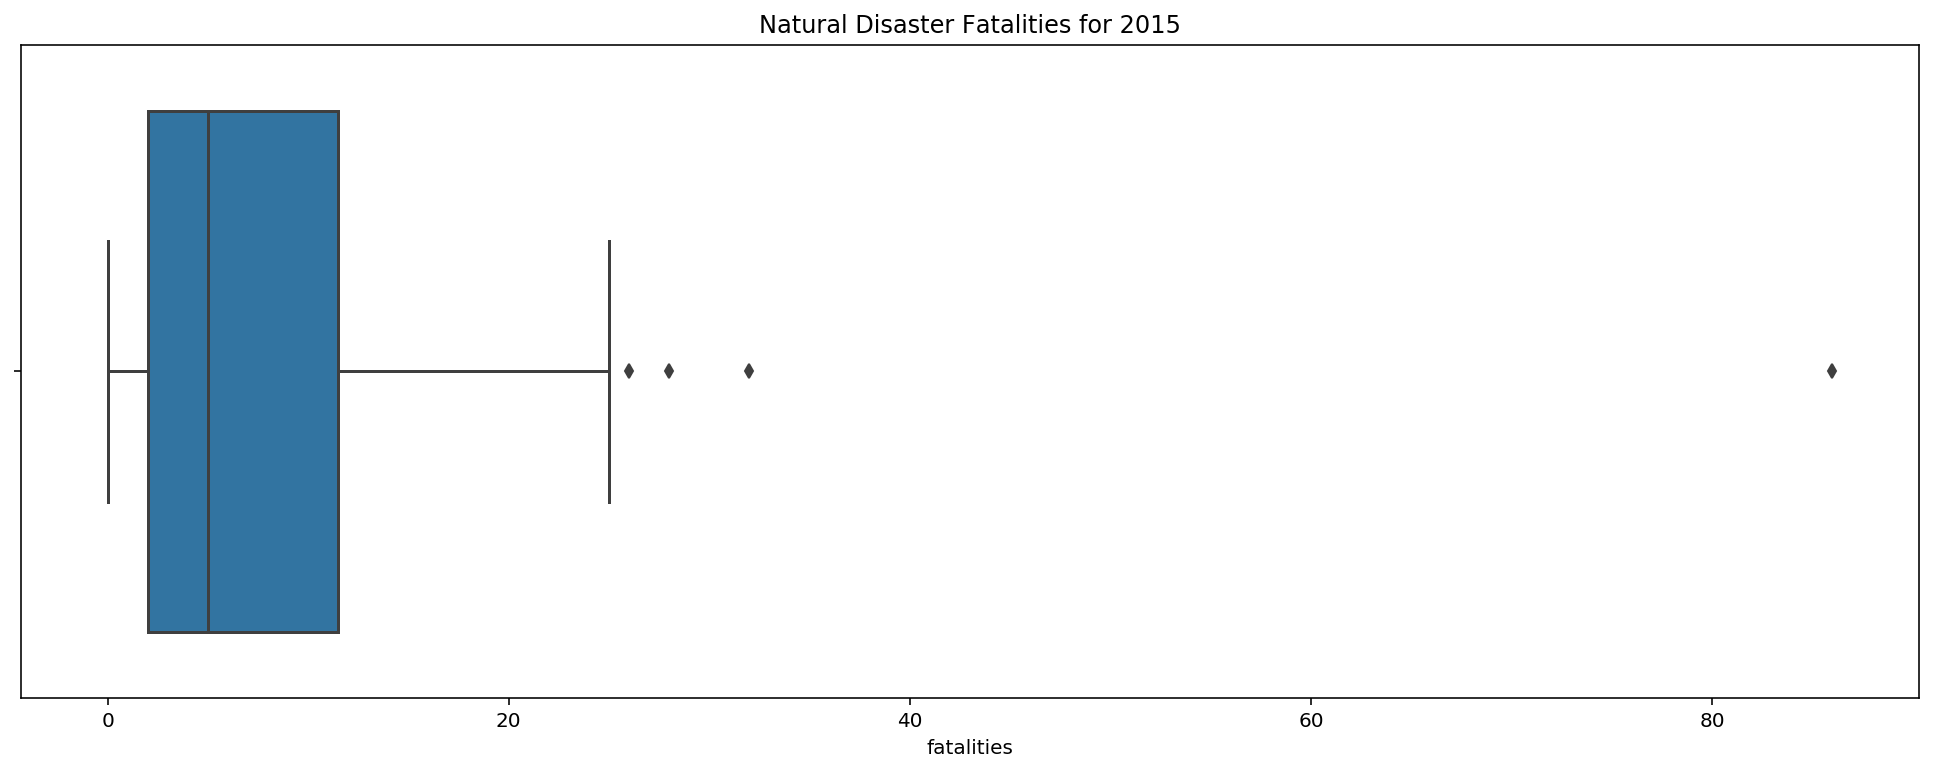

In [100]:
plt.rcParams['figure.figsize'] = (17, 6)
fatalities2015 = sns.boxplot(x= 'fatalities', data= disaster2015)
fatalities2015.set_title('Natural Disaster Fatalities for 2015')

Text(0.5, 1.0, 'Natural Disaster Injuries for 2015')

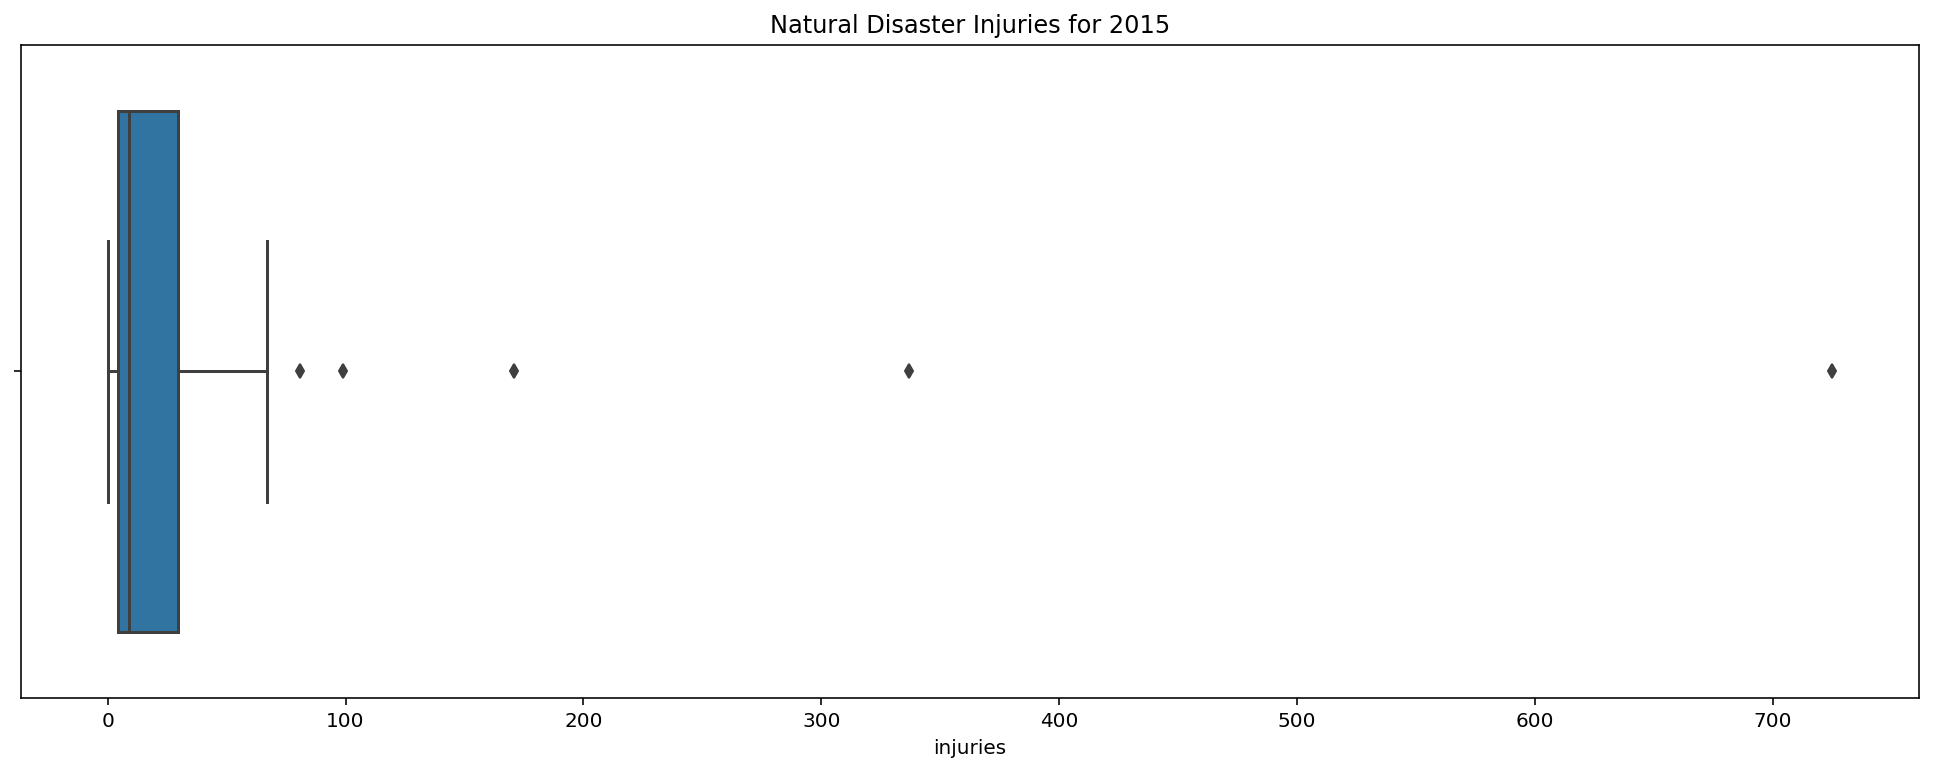

In [101]:
injuries2015 = sns.boxplot(x= 'injuries', data= disaster2015)
injuries2015.set_title('Natural Disaster Injuries for 2015')

In [102]:
pd.concat([disaster2015, disaster2016, disaster2017, disaster2018, disaster2019,
          disaster2020])

,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,AK (Alaska),7,8,25.00,0.00,25.00
1,AL (Alabama),13,17,14.79,0.00,14.79
2,AR (Arkansas),10,337,18.25,27.26,45.51
3,AZ (Arizona),8,58,10.74,0.05,10.79
4,CA (California),12,40,108.51,0.20,108.71
...,...,...,...,...,...,...
45,VT (Vermont),0,0,1.91,0.01,1.92
46,WA (Washington),5,11,1340.16,0.52,1340.68
47,WI (Wisconsin),11,1,79.28,0.26,79.54
48,WV (West Virginia),1,3,5.62,0.00,5.62


In [109]:
# filepath = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2015.csv') 
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# disaster2015.to_csv(filepath)  

In [111]:
# filepath2016 = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2016.csv') 
# filepath2016.parent.mkdir(parents=True, exist_ok=True)  
# disaster2016.to_csv(filepath2016) 

In [114]:
# filepath2017 = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2017.csv') 
# filepath2017.parent.mkdir(parents=True, exist_ok=True)  
# disaster2017.to_csv(filepath2017) 

In [117]:
# filepath2018 = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2018.csv') 
# filepath2018.parent.mkdir(parents=True, exist_ok=True)  
# disaster2018.to_csv(filepath2018) 

In [119]:
# filepath2019 = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2019.csv') 
# filepath2019.parent.mkdir(parents=True, exist_ok=True)  
# disaster2019.to_csv(filepath2019) 

In [121]:
# filepath2020 = Path('datasets/nat_disast_bystate_deaths_cost/cleaned_disaster2020.csv') 
# filepath2020.parent.mkdir(parents=True, exist_ok=True)  
# disaster2020.to_csv(filepath2020) 

In [126]:
filepath = Path('datasets/nat_disast_bystate_deaths_cost')

files = filepath.glob('cleaned_disaster*.csv')

# create a list of dataframes
df_list = list()

for f in files:
    # extract year from filename, by slicing the last four characters off the stem
    year = (f.stem)[-4:]
    
    # read the file and add column names
    x = pd.read_csv(f, header=0, names=['state', 'fatalities', 'injuries', 'property_damage', 
                                           'crop_damage', 'total_damage'])
    
    # add a year column at index 0; use int(year) if the year should be an int, otherwise use only year
    x.insert(0, 'year', int(year))
    
    # append to the list
    df_list.append(x)
    
# create one dataframe from the list of dataframes
combined_disasters = pd.concat(df_list).reset_index(drop=True)

In [127]:
combined_disasters

,year,state,fatalities,injuries,property_damage,crop_damage,total_damage
0,2018,AK (Alaska),0,0,3.89,0.00,3.89
1,2018,AL (Alabama),6,35,8.34,0.00,8.34
2,2018,AR (Arkansas),3,12,19.82,0.04,19.86
3,2018,AZ (Arizona),4,44,67.45,0.00,67.45
4,2018,CA (California),128,318,19500.67,150.00,19650.67
...,...,...,...,...,...,...,...
295,2015,VT (Vermont),0,0,3.55,0.00,3.55
296,2015,WA (Washington),8,7,28.94,0.02,28.96
297,2015,WI (Wisconsin),4,8,8.73,0.01,8.74
298,2015,WV (West Virginia),4,2,20.73,0.00,20.73


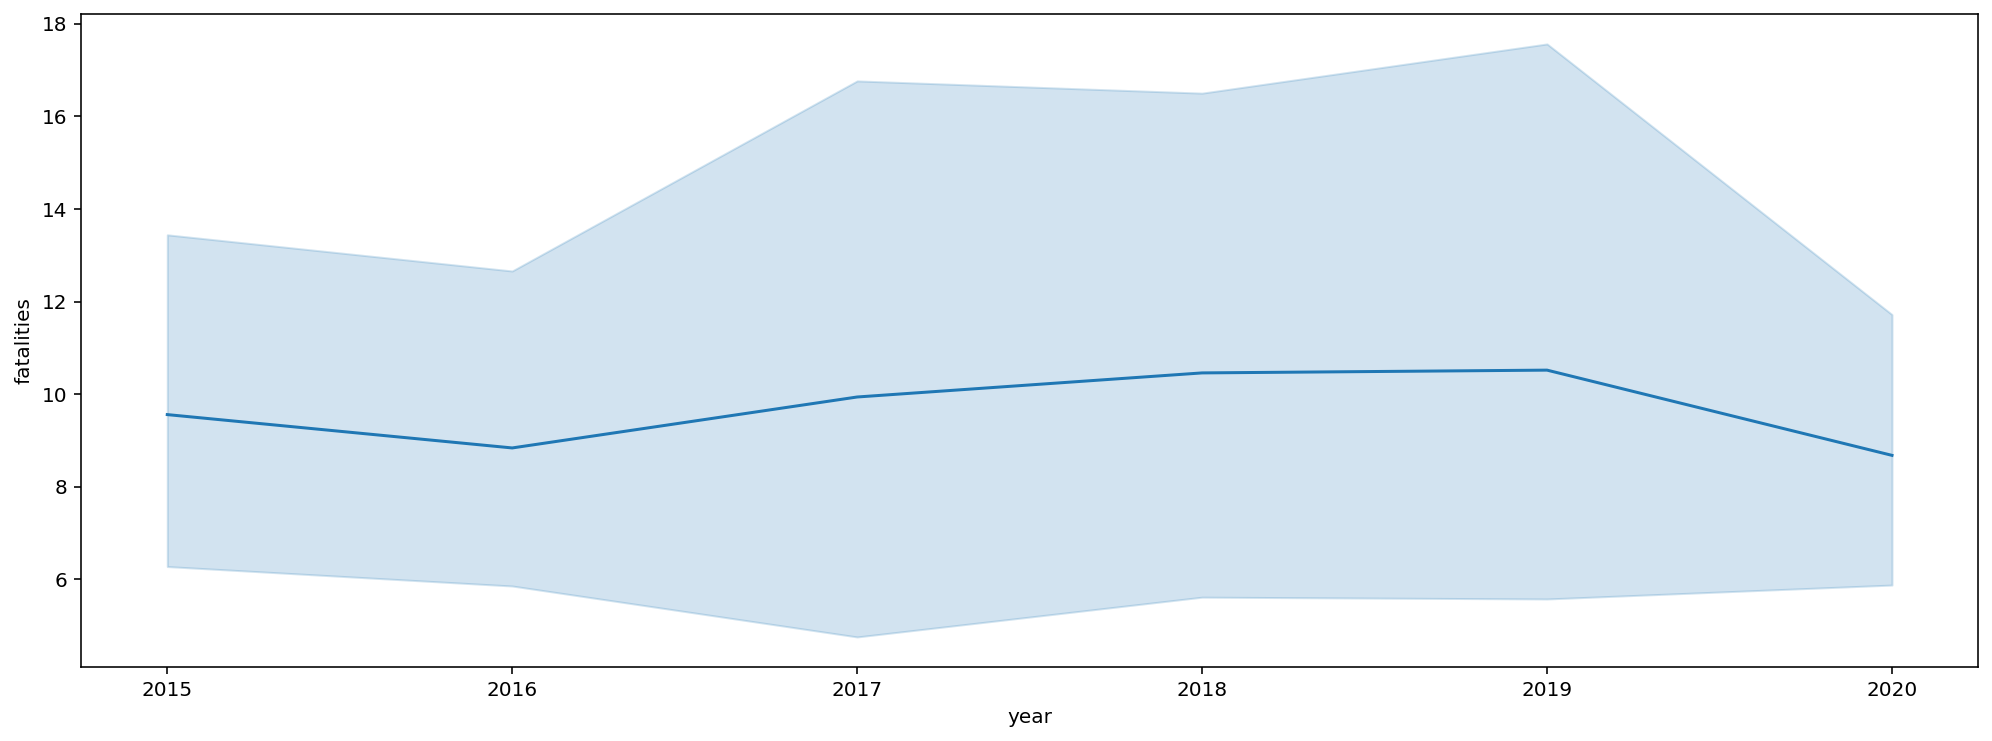

In [132]:
sns.lineplot(x= 'year', y= 'fatalities', data= combined_disasters)

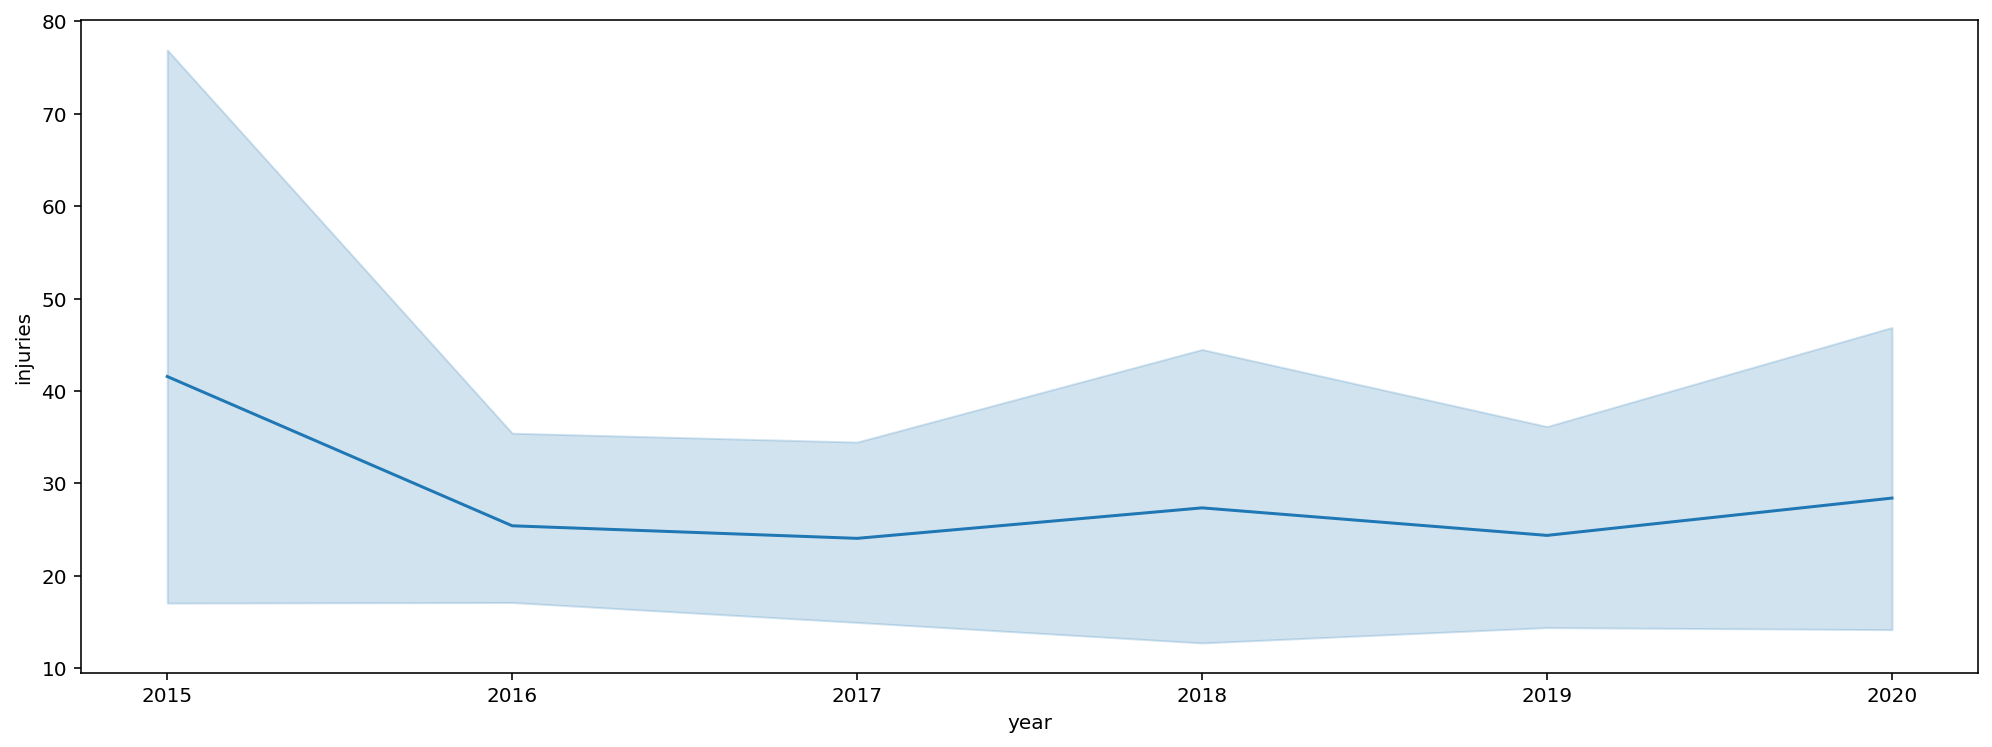

In [133]:
sns.lineplot(x= 'year', y= 'injuries', data= combined_disasters)